# Tensors and Jupyter tricks

Based on notebook 01 from NYU DS-GA 1008

In [1]:
import torch

In [4]:
# See available classes using ? and a wildcard 
torch.*Tensor? # Press ESC to exit

In [7]:
# Pull up documentation
torch.nn.Module?

In [9]:
## Dropping into Bash
!ls -lh

total 72
-rw-r--r--@ 1 benjaminbasseri  staff    31K Mar 27 11:59 00-NeuralNets.ipynb
-rw-r--r--@ 1 benjaminbasseri  staff   1.4K Mar 27 18:24 01-Tensors.ipynb


In [13]:
%%bash
# bash script in jupyter
for f in $(ls *.*); do
    echo $(wc -l $f)
done

485 00-NeuralNets.ipynb
79 01-Tensors.ipynb


## Tensors

In [15]:
# creates a 2x3x4 tensor
t = torch.Tensor(2, 3, 4) 
type(t)

torch.Tensor

In [16]:
t.size()

torch.Size([2, 3, 4])

In [17]:
print('t size:', ' \u00D7 '.join(map(str, t.size())))

t size: 2 × 3 × 4


In [19]:
print(f'point in a {t.numel()} dimensional space')
print(f'organized in {t.dim()} sub-dimensions')

point in a 24 dimensional space
organized in 3 sub-dimensions


In [22]:
t

tensor([[[0.0000e+00, 0.0000e+00, 1.4013e-45, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [1.4013e-45, 0.0000e+00, 1.4013e-45, 0.0000e+00]]])

In [23]:
# Operations that mutate tensors in place are postfixed with _
t.random_(10)
t

tensor([[[1., 2., 8., 1.],
         [3., 3., 7., 6.],
         [6., 9., 2., 7.]],

        [[2., 6., 8., 6.],
         [6., 5., 2., 9.],
         [9., 6., 4., 1.]]])

In [24]:
# Permanently resize tensors
r = torch.Tensor(t)
r.resize_(3, 8)
r

tensor([[1., 2., 8., 1., 3., 3., 7., 6.],
        [6., 9., 2., 7., 2., 6., 8., 6.],
        [6., 5., 2., 9., 9., 6., 4., 1.]])

In [25]:
# Zero out a tensor in-place
r.zero_()

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [26]:
t

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [27]:
s = r.clone()
s.fill_(1)
print(s)
print(r)

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


## Vectors

In [28]:
v = torch.Tensor([1, 2, 3, 4])
v

tensor([1., 2., 3., 4.])

In [30]:
print(f'dim: {v.dim()}, size: {v.size()[0]}')

dim: 1, size: 4


In [31]:
w = torch.Tensor([1, 0, 2, 0])
w

tensor([1., 0., 2., 0.])

In [32]:
# * operator defined as element-wise multiplication (Hadamard product)
v * w

tensor([1., 0., 6., 0.])

In [33]:
# @ operator defined as scalar product (dot product / matrix mult.)
v @ w

tensor(7.)

In [34]:
x = torch.Tensor(5).random_(10)
x

tensor([3., 9., 9., 6., 5.])

In [37]:
# Tensors can be indexed like lists or numpy arrays
print(f'first: {x[0]}, last: {x[-1]}')

first: 3.0, last: 5.0


In [40]:
# Extract a sub-tensor (slicing)
v[1:3]

tensor([2., 3.])

In [41]:
# Create a tensor based on range
v = torch.arange(1, 5)
v

tensor([1, 2, 3, 4])

In [42]:
# Element-wise exponentiation
print(v.pow(3), v)

tensor([ 1,  8, 27, 64]) tensor([1, 2, 3, 4])


## Matrices

In [43]:
# Create a 2x4 tensor
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [44]:
m.dim()

2

In [46]:
# the 'size' tensor is row x columns
print(m.size(0), m.size(1), m.size(), sep=' -- ')

2 -- 4 -- torch.Size([2, 4])


In [47]:
# Returns total number of elements, 'num--el'
m.numel()

8

In [48]:
# Indexing
m[0][2]

tensor(3.)

In [50]:
# Indexing an entry still returns a tensor
m[0, 2]

tensor(3.)

In [58]:
# Numpy style col-row indexing
print(m[:, 1]) # 1x2
print(m[:, [1]]) # 2x1
print(m[[0], :]) # 1x4
print(m[0, :]) # (4,)

tensor([5., 2.])
tensor([[5.],
        [2.]])
tensor([[2., 5., 3., 7.]])
tensor([2., 5., 3., 7.])


In [62]:
# Create a tensor of numbers 1 to 4
v = torch.arange(1., 5)
v

tensor([1., 2., 3., 4.])

In [63]:
# Scalar product
m @ v

tensor([49., 47.])

In [65]:
m[[0], :] @ v # first row of m times v

tensor([49.])

In [66]:
m[[1], :] @ v # second row of m times v

tensor([47.])

In [69]:
m + torch.rand(2, 4) # addition is element-wise

tensor([[2.6087, 5.9028, 3.9658, 7.0070],
        [4.7257, 2.9559, 1.4302, 9.2309]])

In [70]:
m * torch.rand(2, 4) # * multiplication is element-wise (Hadamard)

tensor([[1.9807, 3.4817, 0.8297, 4.7201],
        [1.3111, 1.7395, 0.0232, 3.3753]])

In [71]:
m / torch.rand(2, 4) # division is Hadamard as well

tensor([[ 4.1081,  7.9183,  3.2922, 18.0200],
        [27.6282,  2.6558,  1.6958,  9.5385]])

In [72]:
m.size()

torch.Size([2, 4])

In [73]:
# Transpose 
m.t()

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

In [74]:
# Equivalently
m.transpose(0, 1)

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

In [75]:
# Using ranges to create tensors
torch.arange(3., 9)

tensor([3., 4., 5., 6., 7., 8.])

In [76]:
torch.arange(5.7, -2.1, -3)

tensor([ 5.7000,  2.7000, -0.3000])

In [77]:
torch.linspace(3, 8, 20) # shape of (20,)

tensor([3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
        5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
        7.7368, 8.0000])

In [79]:
torch.linspace(3, 8, 20).view(1, -1) # shape of 1x20

tensor([[3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
         5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
         7.7368, 8.0000]])

In [81]:
# Create a zero matrix
torch.zeros(3, 5)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [82]:
# Create a ones tensor
torch.ones(3, 2, 5)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [83]:
# Create identity matrix
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

(array([ 1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,
         1.,  2.,  1.,  0.,  3.,  5.,  3.,  0., 12.,  8.,  2.,  4., 11.,
         8., 10., 11., 11., 18., 15., 10., 15.,  8., 19., 17., 15., 18.,
        18., 24., 24., 23., 23., 20., 23., 32., 23., 23., 28., 30., 29.,
        24., 26., 24., 23., 31., 20., 29., 26., 16., 17., 15., 16., 24.,
        10., 18.,  9., 15., 11.,  8.,  5., 14.,  6., 10.,  6.,  3.,  3.,
         2.,  4.,  6.,  5.,  1.,  3.,  1.,  3.,  3.,  2.,  1.,  0.,  1.,
         0.,  2.,  0.,  0.,  0.,  1.,  1.,  0.,  1.]),
 array([-3.238835  , -3.1738396 , -3.1088443 , -3.0438488 , -2.9788532 ,
        -2.913858  , -2.8488624 , -2.7838671 , -2.7188716 , -2.653876  ,
        -2.5888808 , -2.5238853 , -2.4588897 , -2.3938944 , -2.328899  ,
        -2.2639034 , -2.198908  , -2.1339126 , -2.068917  , -2.0039217 ,
        -1.9389262 , -1.8739308 , -1.8089354 , -1.74394   , -1.6789445 ,
        -1.6139491 , -1.5489537 , -1.4839581 , -1.4189627 , -1.353967

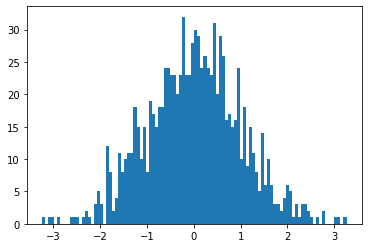

In [86]:
# Set default plots
# from res.plot_lib import set_default
from matplotlib import pyplot as plt
# set_default()

# Sample from standard normal
plt.hist(torch.randn(1000).numpy(), 100)

(array([2.0000e+00, 0.0000e+00, 1.0000e+00, 4.0000e+00, 0.0000e+00,
        7.0000e+00, 6.0000e+00, 8.0000e+00, 2.7000e+01, 2.2000e+01,
        2.2000e+01, 2.8000e+01, 6.1000e+01, 8.4000e+01, 1.1000e+02,
        1.2900e+02, 2.0500e+02, 2.6900e+02, 3.9500e+02, 5.0000e+02,
        6.7000e+02, 8.7100e+02, 1.1820e+03, 1.4440e+03, 1.8390e+03,
        2.4330e+03, 2.8500e+03, 3.6320e+03, 4.3860e+03, 5.3920e+03,
        6.3020e+03, 7.7060e+03, 8.9740e+03, 1.0468e+04, 1.2185e+04,
        1.4039e+04, 1.5867e+04, 1.7874e+04, 2.0264e+04, 2.2313e+04,
        2.4654e+04, 2.6788e+04, 2.8744e+04, 3.0859e+04, 3.2652e+04,
        3.4371e+04, 3.5887e+04, 3.6543e+04, 3.7569e+04, 3.8185e+04,
        3.8437e+04, 3.8098e+04, 3.7274e+04, 3.6383e+04, 3.5203e+04,
        3.3526e+04, 3.2062e+04, 3.0115e+04, 2.8062e+04, 2.5823e+04,
        2.3627e+04, 2.1208e+04, 1.9168e+04, 1.7038e+04, 1.5109e+04,
        1.3311e+04, 1.1469e+04, 9.7540e+03, 8.4180e+03, 7.1070e+03,
        5.8000e+03, 4.9570e+03, 4.0380e+03, 3.31

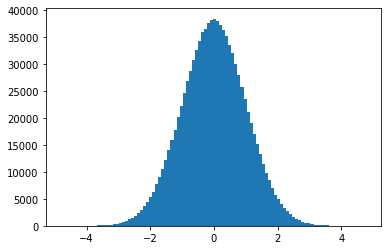

In [87]:
plt.hist(torch.randn(10**6).numpy(), 100)

## Casting shapes

In [88]:
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [90]:
# Cast m to double type (float64)
m_double = m.double()
m_double

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]], dtype=torch.float64)

In [91]:
# Cast to byte type (uint8)
m_byte = m.byte()
m_byte

tensor([[2, 5, 3, 7],
        [4, 2, 1, 9]], dtype=torch.uint8)

In [92]:
# Assign tensor computation to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
m.to(device)

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [93]:
# Convert tensor to numpy
m_np = m.numpy()
m_np

array([[2., 5., 3., 7.],
       [4., 2., 1., 9.]], dtype=float32)

In [94]:
# Element assignment, in-place, by indexing
m_np[0, 0] = -1
m_np

array([[-1.,  5.,  3.,  7.],
       [ 4.,  2.,  1.,  9.]], dtype=float32)

In [95]:
m

tensor([[-1.,  5.,  3.,  7.],
        [ 4.,  2.,  1.,  9.]])

In [100]:
import numpy as np

# Convert numpy to tensor
n_np = np.arange(5)
n = torch.from_numpy(n_np)
print(n_np, n)

[0 1 2 3 4] tensor([0, 1, 2, 3, 4])


In [101]:
# In-place multiplication of a tensor affects the numpy array it came from
n.mul_(2)
n_np

array([0, 2, 4, 6, 8])

In [102]:
# Creates two tensor of size 1x4
a = torch.Tensor([[1, 2, 3, 4]])
b = torch.Tensor([[5, 6, 7, 8]])
print(a.size(), b)

torch.Size([1, 4]) tensor([[5., 6., 7., 8.]])


In [103]:
torch.cat((a,b), 1)

tensor([[1., 2., 3., 4., 5., 6., 7., 8.]])